<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="Indigo" size=8px>
                  <b> Spark Foundation-Prediction Using Decision Tree Algorithm </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### GRIP- Spark Foundation

### Data Science & Business Analytics

### Name- Swapnil Patil

### Task 6: Prediction Using Decision Tree Algorithm

### Problem Statement:

* From the given `Iris` Dataset.Create a Decision Tree Classifier and Visualize it graphically.

### Importing libraries in Python

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

<a id="Intro1_1"></a>
<div align='left'>
    <font color='black' , size = 3px>
        <b> Data Importing </b>
    </font>
</div>

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<a id="Intro1_1"></a>
<div align='left'>
    <font color='black' , size = 3px>
        <b> Check for Null Values </b>
    </font>
</div>

In [3]:
# Check for Null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* There is no Null values in data.

<a id="Intro1_1"></a>
<div align='left'>
    <font color='black' , size = 3px>
        <b> Check for datatypes </b>
    </font>
</div>

In [4]:
# Check for datatypes.
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
# Check
df['Species'].value_counts()
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

* Change the wrong classified datatype and convert into correct datatype.

<a id="Intro1_1"></a>
<div align='left'>
    <font color='black' , size = 3px>
        <b> Check for duplicates </b>
    </font>
</div>

In [6]:
# Check for Duplicates
df[df.duplicated()==True]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


* There is no duplicated Values in dataset.

In [7]:
# Assigning
X,y=df.drop(columns=['Species']),df['Species']

<a id="Intro1_1"></a>
<div align='left'>
    <font color='black' , size = 3px>
        <b> Train-Test Split </b>
    </font>
</div>

In [8]:
# Split of Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(30, 5)
(120,)
(30,)


<a id="Intro1_1"></a>
<div align='left'>
    <font color='black' , size = 3px>
        <b> Model Building by Supervised Learning Classification </b>
    </font>
</div>

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [10]:
# Classifier
decision=DecisionTreeClassifier()
decision.fit(x_train,y_train)

DecisionTreeClassifier()

### Allow us to envision the Decision Tree to comprehend it better

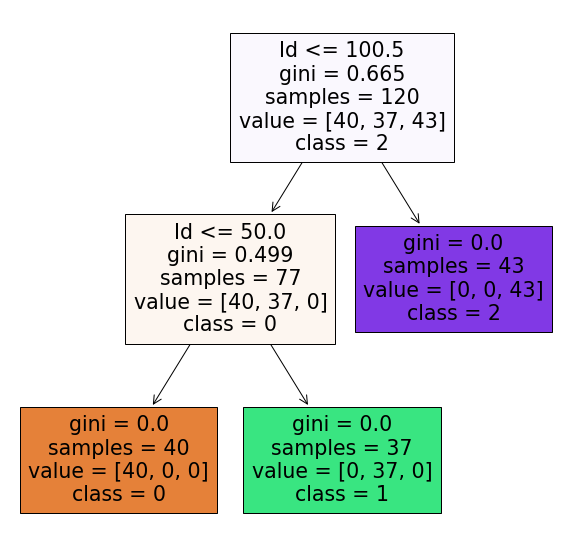

In [13]:
# Tree
plt.figure(figsize=(10,10))
_=tree.plot_tree(decision,feature_names=x_train.columns,class_names=['0','1','2'],filled=True,max_depth=4)

<a id="Intro1_1"></a>
<div align='left'>
    <font color='black' , size = 3px>
        <b> Prediction: </b>
    </font>
</div>

In [14]:
# Predict
y_pred=decision.predict(x_test)

In [32]:
# Training Model
print('Accuracy of Training set:',decision.score(x_train,y_train))

Accuracy of Training set: 1.0


In [33]:
# Testing Model
print('Accuracy of Testing set:',decision.score(x_test,y_test))

Accuracy of Testing set: 1.0


In [17]:
# Model is overfitt.

In [18]:
# Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy of Model is:',accuracy_score(y_test,y_pred))

Accuracy of Model is: 1.0


In [19]:
# Grid Search Cv
from sklearn.model_selection import GridSearchCV
decision_t=DecisionTreeClassifier()

In [20]:
# Tuning Parameter
tuned=[{'criterion':['gini','entropy'],'max_depth':range(1,7),'min_samples_split':range(1,8),
       'min_samples_leaf':range(1,6)}]

In [21]:
# Grid_search
from warnings import filterwarnings
filterwarnings('ignore')
grid_model=GridSearchCV(estimator=decision_t,param_grid=tuned,cv=5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 7),
                          'min_samples_leaf': range(1, 6),
                          'min_samples_split': range(1, 8)}])

In [22]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [23]:
# Classifier
decision=DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1,min_samples_split=2)
decision.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [24]:
# Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
print('Accuracy of Model is:',accuracy_score(y_test,y_pred))

Accuracy of Model is: 1.0


In [25]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



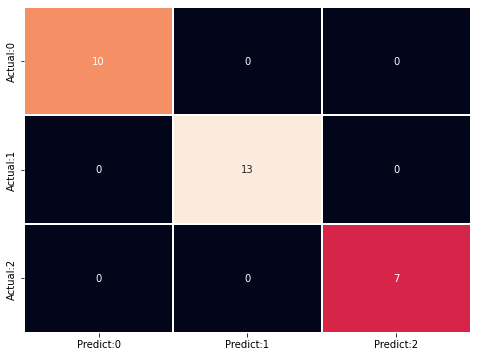

In [76]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test,y_pred)
matrix=pd.DataFrame(data=cm,index=['Actual:0','Actual:1','Actual:2'],columns=['Predict:0','Predict:1','Predict:2'])
sns.heatmap(data=matrix,annot=True,cbar=False,fmt='d',linewidths=0.03)
plt.show()

### 🗒️ Interpretation

   **You can now take care of any new/test information to this classifer and it would have the option to anticipate the right class accordingly.**